# Assessing the value of data

**Problem statement:** The bank wants to create more value out of its customer data. Analyze the data and propose how internal and external utilization of the analysis results increases the banks revenues.

In [ ]:
# making sure warnings are not displayed in the console

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# connecting Google Drive account to Colab notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# __1. Initial Data Analysis__

In [ ]:
# loading the csv dataset as pandas dataframe
# Note: Please update the path to your local file path for this to work

data = pd.read_csv('/content/drive/My Drive/ds2020/Churn_Modeling.csv')

In [ ]:
# check sample of the data

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# detailed information on each column of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Statistical description of the dataset

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Describing each column feature

* __RowNumber__: Row number for the row in the data table.
* __CustomerId__: Unique Identification number of the customer.
* __Surname__: Surname (Lastname) of the customer.
* __CreditScore__: Credit Score of the customer.
* __Geography__: Geographical location (country) of the customer.
* __Gender__: Gender of the customer (Male / Female).
* __Age__: Age of the customer.
* __Tenure__: Number of years the customers has been associated with the bank.
* __Balance__: The amount of balance in the customer's account.
* __NumOfProducts__: 
* __HasCrCard__: Denotes if the customer owns a credit card with the bank.
* __IsActiveMember__: Denotes if the customer is active with the bank.
* __EstimatedSalary__: Estimated salary of the customer.
* __Exited__: Denotes if the customer has churned (exited) from the bank or not.

## Data type of each column feature variable

In [ ]:
# data type of each columns feature variable

data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### __<font color='green'>Analysis</font>__

* All the columns except ___Surname___, ___Geography___, and ___Gender___ are of numerical data types.

# __2. Data Preprocessing__

## 2.1. Deleting Unnecessary Information

The columns ___RowNumber___, ___CustomerId___, and ___Surname___ are related to personal data of the customers. These columns do not have any quantitative impact on any calculations whatsoever. Hence, we can avoid these extra columns of information by removing them from the data.

In [ ]:
# sample of data before deleting the unnecessary columns

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# deleting the unnecessary columns (RowNumber, CustomerId, Surname)

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
# sample of data after deleting the unnecessary columns

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2.2. Dealing with NULL or missing data

Often, we may find missing data or NULL data in certain columns of a dataframe or dataset. Such NULL data values not only pose problems in the analysis, but also terminate any mathematical calculations that are carried out on the dataset without dealing with them. Therefore, we need to make sure that there are no such data cells in our dataset.

In [ ]:
# We can check if the pandas dataframe 'data' has any null values in each of its column using the isnull() function.
# Furthermore, the sum() function tells us the total null values in each column.

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### __<font color='green'>Observation</font>__

Surprisingly, we do not find any NULL or missing values in this data. This is really good for our analysis.

# __3. Exploratory Data Analysis__

Now that we have preprocessed the data by removing unnecessary information from it, we can start an exploratory analysis to find possible correlations between different features (columns) of the data and resulting outcomes (possibly one data column). We will analyze each and every possible column in the data to measure its eligibility to be a valuable feature for the exit criteria of any customer.



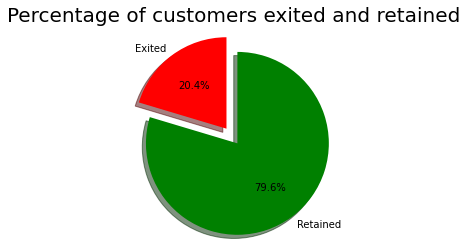

In [ ]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained

labels = ['Exited', 'Retained']
sizes = [data.Exited[data['Exited'] == 1].count(), data.Exited[data['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'g'], )
plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()

### __<font color='green'>Observation</font>__

From the given data, it is visible that around __20%__ of the people have exited or churned. So, we can try to create a machine learning model that can predict whether a customer will exit the bank or not given his/her banking data.

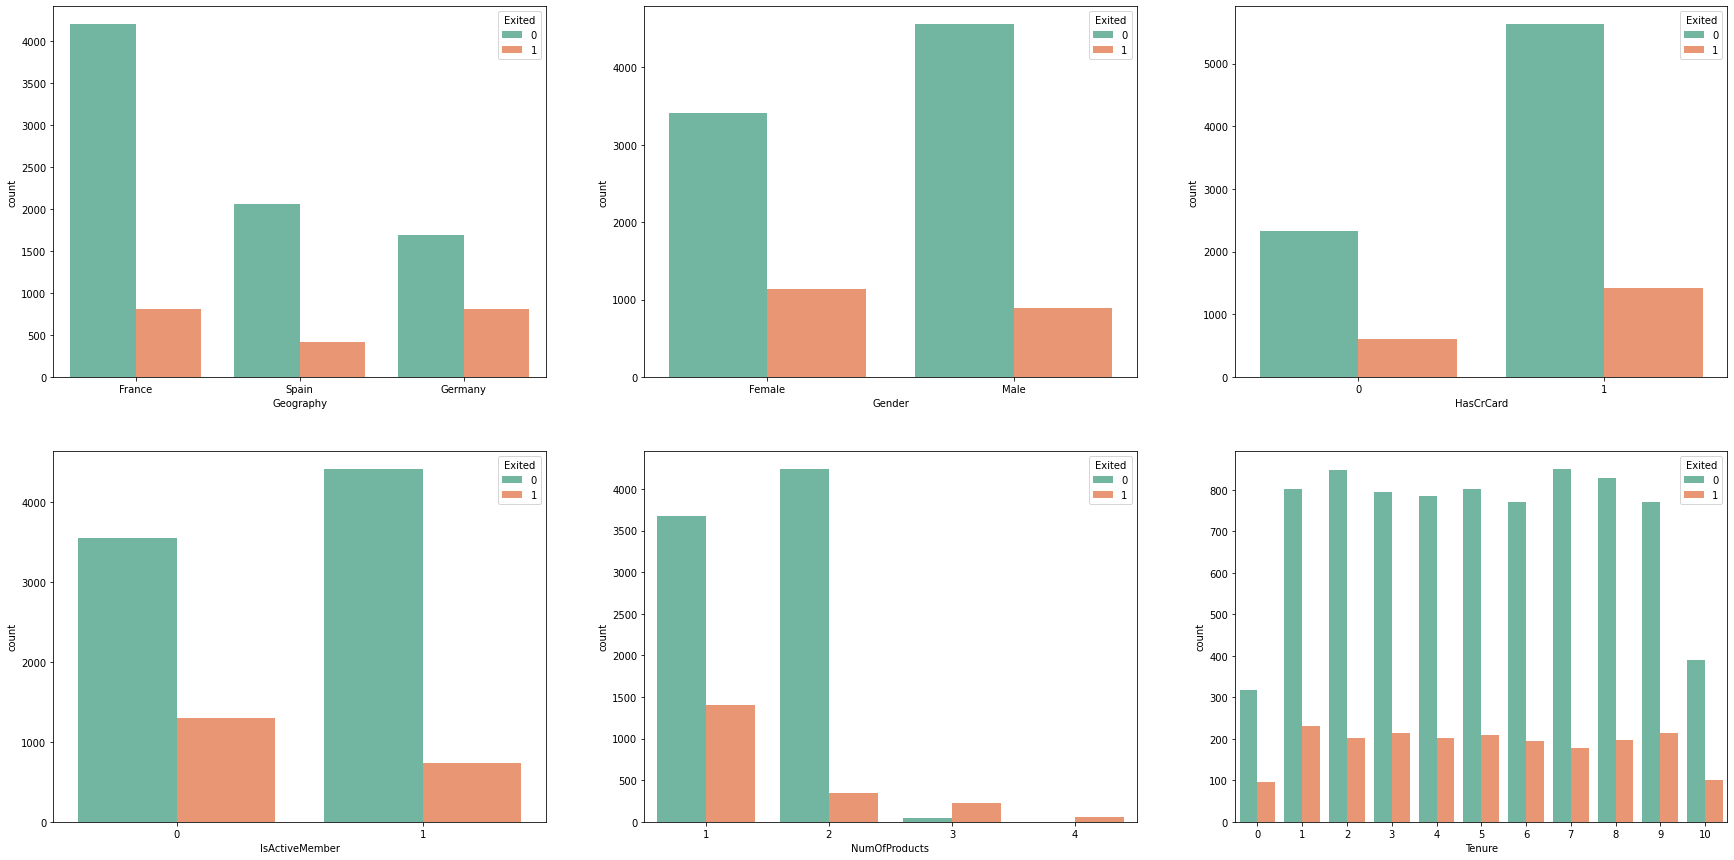

In [ ]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=data, palette='Set2', ax=ax[1][2])

plt.show()

### __<font color='green'>Observations</font>__

* __Geography:__ We can see that majority of the data is about people France. Ideally for an evenly-distributed data, if the amount of people from a place is the majority, then the majority of churning should also be within that group. However, it is not so in this case as we see that number of exited people who belong to Germany is almost equal to the number of exits from France.
* __Gender:__ We can clearly see the __Female customers__ had more exits than the male customers.
* __Credit cards:__ It is generally expected that people who have more interactions and products of the bank, would likely be retained for a longer time. However, we can see that people who have credit cards have more exits than those who do not own credit cards.
* __Active Member:__ This is an expected observation. We can see that inactive members have been churned more than members who are active.
* __Number of Products:__ This is also an expected observation, where we see that customers who own more products from the bank are likely to be retained for a longer time than those who own less products.
* __Tenure:__ We see that the tenure of a customer does not really tell us much if that customer is likely to be churned or not. Initially, it looks like new joinees and older people (10 years) have been churned less. However, on a closer analysis we can see that the overall number of retained customer are significantly less in both these cases. As a result, we can probably conclude that new joinees and older customers may be more likely to be churned as their churn rate (percentage) is likely to be higher than other tenure rates.

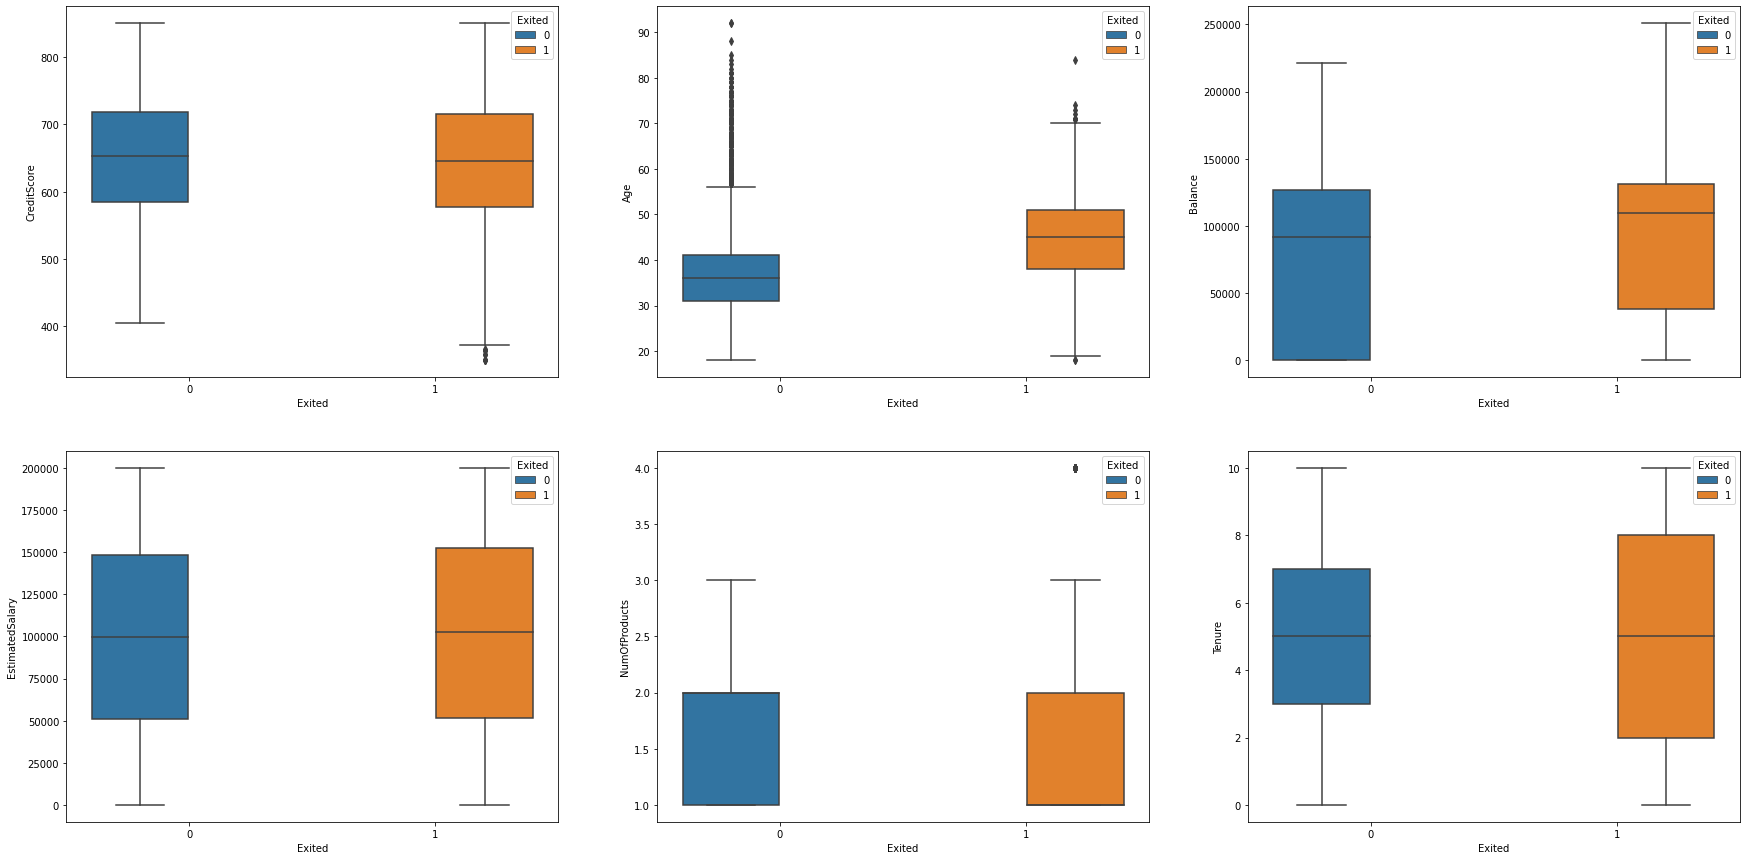

In [ ]:
# Count column plots to map the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=data, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=data, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=data, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=data, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=data, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=data, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

### __<font color='green'>Observations</font>__

* __Credit Score:__ We can see that Credit Score does not have much effect on the customer churn.
* __Age:__ Here we can see that the older customers are more likely to be churned from the bank. This is most probably to keep a younger manpower in the organization.
* __Balance:__ When it comes to Balance, we see that the bank is losing a significant number of customers with high balance in their accounts. This is likely to affect the bank's capital as well.
* __Estimated Salary:__ Estimated Salary does not seem to affect the customer churn much.
* __Number of Products:__ We see that the number of products also does not seem to affect the customer churn.
* __Tenure:__ For tenure, as we can see here too, customer belonging more to the two extreme tenure groups (new joinees and older ones) are more likely to be churned.

# __4. Data Preparation__

We first create a training data set with the categorical variables and continuous variables. We also include the 'Exited' target variable in the data.

In [ ]:
# list of continuous and categorical variables/features

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

# separating the train and test data using a 80%-20% split

data_train = data.sample(frac=0.8, random_state=100)
data_test = data.drop(data_train.index)

# check the number of rows in each data set for verification

print('Number of rows in train data: ', len(data_train))
print('Number of rows in test data: ', len(data_test))

print()

data_train = data_train[['Exited'] + continuous_vars + categorical_vars]
data_train.head()

Number of rows in train data:  8000
Number of rows in test data:  2000



,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,0,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,0,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,0,France,Male


Here, we change the 0 values of the variable columns __HasCrCard__ and __IsActiveMember__ into -1. This will allow us to include a negative relation in the modeling.

In [ ]:
# turning 0 values of numerical categorical features into -1
# to introduce negative relation in the calculations

data_train.loc[data_train.HasCrCard == 0, 'HasCrCard'] = -1
data_train.loc[data_train.IsActiveMember == 0, 'IsActiveMember'] = -1

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,-1,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,-1,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,-1,France,Male


Next we one-hot encode the remaining text categorical variables __Geography__ and __Gender__.

In [ ]:
# list of categorical variables

var_list = ['Geography', 'Gender']

# turning the categorical variables into one-hot vectors

for var in var_list:
  for val in data_train[var].unique():
    data_train[var + '_' + val] = np.where(data_train[var] == val, 1, -1)

data_train = data_train.drop(var_list, axis=1)

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,632,23,3,122478.51,1,147230.77,1,-1,1,-1,-1,1,-1
9225,0,594,32,4,120074.97,2,162961.79,1,1,1,-1,-1,-1,1
3854,0,687,33,9,135962.40,2,121747.96,1,-1,1,-1,-1,1,-1
2029,0,520,33,4,156297.58,2,166102.61,1,1,-1,1,-1,1,-1
3539,0,667,42,6,0.00,1,88890.05,1,-1,-1,1,-1,1,-1


Next, we normalize the continuous variables between 0 and 1. This step is implemented so that there is no overflow of values during the calculations.

In [ ]:
min_values = data_train[continuous_vars].min()
max_values = data_train[continuous_vars].max()

data_train[continuous_vars] = (data_train[continuous_vars] - min_values) / (max_values - min_values)
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,0.564,0.067568,0.3,0.488160,0.000000,0.736166,1,-1,1,-1,-1,1,-1
9225,0,0.488,0.189189,0.4,0.478581,0.333333,0.814829,1,1,1,-1,-1,-1,1
3854,0,0.674,0.202703,0.9,0.541903,0.333333,0.608740,1,-1,1,-1,-1,1,-1
2029,0,0.340,0.202703,0.4,0.622952,0.333333,0.830534,1,1,-1,1,-1,1,-1
3539,0,0.634,0.324324,0.6,0.000000,0.000000,0.444435,1,-1,-1,1,-1,1,-1


# __5. Machine Learning classifiers (selecting optimal parameters)__

Here, we will try to train different machine learning classification models to our data. Once we get the model details for each of the models, we can select the best model from them for our training and testing purposes.

### __<font color='green'>Models</font>__

These are the models that we will try to use now:

* Stochastic Gradient Descent (SGD) classifier 
* Logistic Regression
* Support Vector Machines (SVM) with different kernel methods
  * Linear kernel
  * RBF kernel
  * Poly kernel
* Random Forest Classifier
* Extreme Gradient Boost Classifier (XGBoost)

In [ ]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# this method will show us the details of each model
# which will help us in deciding the best model

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

Now we will try to fit different classifier models with a variety of parameters and use GridSearch algorithm to get the best set of parameters for each model.

In [ ]:
# SGD classifier

start_time = time.time()

parameters = {'loss': ['hinge', 'log'],
              'max_iter': [50, 100, 200, 300], 
              'fit_intercept':[True],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

SGD_grid_model = GridSearchCV(SGDClassifier(), 
                              param_grid=parameters, 
                              cv=10, 
                              refit=True, 
                              verbose=0)

SGD_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SGD_grid_model)

[INFO] Time taken: 25.0 seconds.

0.8118749999999999
{'fit_intercept': True, 'loss': 'log', 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=300,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=1e-06,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
# Logistic Regression classifier

start_time = time.time()

parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
              'max_iter': [50, 100, 200, 300], 
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

LR_grid_model = GridSearchCV(LogisticRegression(), 
                             param_grid=parameters, 
                             cv=10, 
                             refit=True, 
                             verbose=0)

LR_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(LR_grid_model)

[INFO] Time taken: 71.9 seconds.

0.813875
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [ ]:
# Support Vector Machines (RBF kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['rbf']}

SVM_rbf_grid_model = GridSearchCV(SVC(), 
                                  parameters, 
                                  cv=5, 
                                  refit=True, 
                                  verbose=0)

SVM_rbf_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_rbf_grid_model)

[INFO] Time taken: 549.9 seconds.

0.8466249999999998
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Support Vector Machines (Poly kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['poly'],
              'degree': [2, 3]}

SVM_poly_grid_model = GridSearchCV(SVC(), 
                                   parameters, 
                                   cv=5, 
                                   refit=True, 
                                   verbose=0)

SVM_poly_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_poly_grid_model)

[INFO] Time taken: 637.9 seconds.

0.852125
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Random Forest Classifier

start_time = time.time()

parameters = {'max_depth': [6, 7, 8, 9, 10], 
              'max_features': [5, 6, 7, 8, 9],
              'n_estimators':[10, 50, 100],
              'min_samples_split': [3, 5, 6, 7]}

RF_grid_model = GridSearchCV(RandomForestClassifier(),
                             parameters,
                             cv=10,
                             refit=True,
                             verbose=0)

RF_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(RF_grid_model)

[INFO] Time taken: 1643.4 seconds.

0.864625
{'max_depth': 9, 'max_features': 9, 'min_samples_split': 7, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Extreme Gradient Boost (XGBoost) classifier

start_time = time.time()

parameters = {'max_depth': [5, 6, 7, 8],
              'gamma': [0.01, 0.001, 0.001],
              'min_child_weight': [1, 5, 10],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              'n_estimators': [5, 10, 20, 100]}

XGB_grid_model = GridSearchCV(XGBClassifier(), 
                              parameters, 
                              cv=10, 
                              refit=True, 
                              verbose=0)

XGB_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(XGB_grid_model)

[INFO] Time taken: 2130.4 seconds.

0.8630000000000001
{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# __6. Machine Learning classifiers (fitting the best models)__

Here, we take the best models that we obtained from the previous step and try to fit them to our data.

In [ ]:
# SGD classifier

sgd_model = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                          early_stopping=False, epsilon=0.1, eta0=0.0,
                          fit_intercept=True, l1_ratio=0.15,
                          learning_rate='optimal', loss='log', max_iter=300,
                          n_iter_no_change=5, n_jobs=None, penalty='l2', 
                          power_t=0.5, random_state=None, shuffle=True,
                          tol=1e-06, validation_fraction=0.1, verbose=0,
                          warm_start=False)

sgd_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=300,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=1e-06,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Logistic Regression

lr_model = LogisticRegression(C=0.1, class_weight=None, dual=False, 
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=50, multi_class='auto',
                              n_jobs=None, penalty='l2', random_state=None,
                              solver='lbfgs', tol=1e-05, verbose=0,
                              warm_start=False)

lr_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [ ]:
# SVM (RBF kernel)

svm_rbf_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, 
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
                    random_state=None, shrinking=True, tol=0.001,
                    verbose=False)

svm_rbf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# SVM (Poly kernel)

svm_poly_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma=0.1, kernel='poly', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False)

svm_poly_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Random Forest classifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  class_weight=None, criterion='gini', 
                                  max_depth=9, max_features=9,
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0, 
                                  min_impurity_split=None, min_samples_leaf=1, 
                                  min_samples_split=7, 
                                  min_weight_fraction_leaf=0.0, n_estimators=50,
                                  n_jobs=None, oob_score=False,
                                  random_state=None, verbose=0,
                                  warm_start=False)

rf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# XGBoost classifier

xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0.001,
                          learning_rate=0.1, max_delta_step=0, max_depth=5,
                          min_child_weight=1, missing=None, n_estimators=100,
                          n_jobs=1, nthread=None, objective='binary:logistic',
                          random_state=0, reg_alpha=0, reg_lambda=1, 
                          scale_pos_weight=1, seed=None, silent=None,
                          subsample=1, verbosity=1)

xgb_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# __7. Machine Learning classifiers (visualizations)__


Now that we have the best trained models, we need to check the classification reports to track the precision, recall, and f1-score values of each model. After that, we proceed to plot ROC graphs for each to compare their performance against each other.

In [ ]:
print('[INFO] SGD classifier:\n')
print(classification_report(data_train.Exited, sgd_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SGD classifier:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6382
           1       0.59      0.23      0.33      1618

    accuracy                           0.81      8000
   macro avg       0.71      0.60      0.61      8000
weighted avg       0.78      0.81      0.78      8000



In [ ]:
print('[INFO] Logistic Regression classifier:\n')
print(classification_report(data_train.Exited, lr_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Logistic Regression classifier:

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6382
           1       0.69      0.15      0.25      1618

    accuracy                           0.81      8000
   macro avg       0.75      0.57      0.57      8000
weighted avg       0.79      0.81      0.76      8000



In [ ]:
print('[INFO] SVM (RBF) classifier:\n')
print(classification_report(data_train.Exited, svm_rbf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (RBF) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6382
           1       0.84      0.38      0.53      1618

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [ ]:
print('[INFO] SVM (Poly) classifier:\n')
print(classification_report(data_train.Exited, svm_poly_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (Poly) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6382
           1       0.81      0.36      0.50      1618

    accuracy                           0.85      8000
   macro avg       0.83      0.67      0.71      8000
weighted avg       0.85      0.85      0.83      8000



In [ ]:
print('[INFO] Random Forest classifier:\n')
print(classification_report(data_train.Exited, rf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Random Forest classifier:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6382
           1       0.88      0.57      0.69      1618

    accuracy                           0.90      8000
   macro avg       0.89      0.77      0.81      8000
weighted avg       0.90      0.90      0.89      8000



In [ ]:
print('[INFO] Extreme Gradient Boost (XGB) classifier:\n')
print(classification_report(data_train.Exited, xgb_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Extreme Gradient Boost (XGB) classifier:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6382
           1       0.85      0.54      0.66      1618

    accuracy                           0.89      8000
   macro avg       0.87      0.76      0.80      8000
weighted avg       0.88      0.89      0.88      8000



Now we will try to visualize the __Receiver Operating Characteristic (ROC)__ scores and the __Area Under Curve (AUC)__ for each of the trained classifier models.

In [ ]:
def get_roc(y, predict_vals, prob_values):
  roc_score = roc_auc_score(y, predict_vals)
  false_positives, true_positives, _ = roc_curve(y, prob_values)
  return (roc_score, false_positives, true_positives)

In [ ]:
y = data_train.Exited
X = data_train.loc[:, data_train.columns != 'Exited']

roc_sgd, false_sgd, true_sgd = get_roc(y, sgd_model.predict(X), sgd_model.predict_proba(X)[:, 1])
roc_lr, false_lr, true_lr = get_roc(y, lr_model.predict(X), lr_model.predict_proba(X)[:, 1])
roc_svm_rbf, false_svm_rbf, true_svm_rbf = get_roc(y, svm_rbf_model.predict(X), svm_rbf_model.predict_proba(X)[:, 1])
roc_svm_poly, false_svm_poly, true_svm_poly = get_roc(y, svm_poly_model.predict(X), svm_poly_model.predict_proba(X)[:, 1])
roc_rf, false_rf, true_rf = get_roc(y, rf_model.predict(X), rf_model.predict_proba(X)[:, 1])
roc_xgb, false_xgb, true_xgb = get_roc(y, xgb_model.predict(X), xgb_model.predict_proba(X)[:, 1])

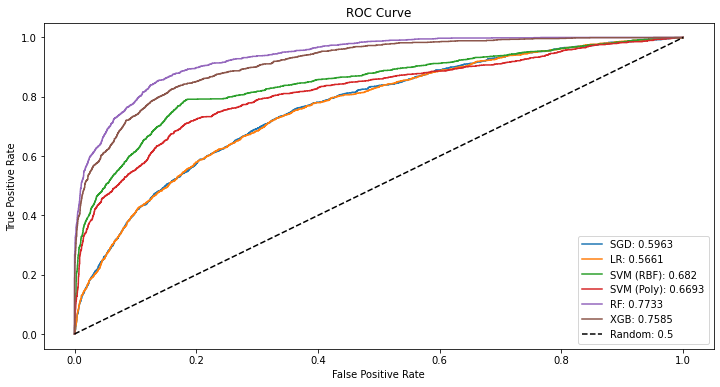

In [ ]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_sgd, true_sgd, label = 'SGD: ' + str(round(roc_sgd, 4)))
plt.plot(false_lr, true_lr, label = 'LR: ' + str(round(roc_lr, 4)))
plt.plot(false_svm_rbf, true_svm_rbf, label = 'SVM (RBF): ' + str(round(roc_svm_rbf, 4)))
plt.plot(false_svm_poly, true_svm_poly, label = 'SVM (Poly): ' + str(round(roc_svm_poly, 4)))
plt.plot(false_rf, true_rf, label = 'RF: ' + str(round(roc_rf, 4)))
plt.plot(false_xgb, true_xgb, label = 'XGB: ' + str(round(roc_xgb, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

### __<font color='green'>Observation</font>__

From the above graph, we can clearly see that the __Random Forest (RF) classifier has the highest ROC score (0.7733)__ and hence covers the highest area under curve as well. From this, we finally choose the Random Forest classifier with its optimal parameters as our final machine learning classifier model. Let us now try to use this model with our test data and see how it works out.



# __8. Machine Learning classifiers (Test Accuracy)__

Now that we have the classifier we want to use (Random Forest classifier), we will try to use it on a test set and analyze how well our model behaves.


In [ ]:
data_test = data_test[['Exited'] + continuous_vars + categorical_vars]

# Change the 0 in categorical variables to -1

data_test.loc[data_test.HasCrCard == 0, 'HasCrCard'] = -1
data_test.loc[data_test.IsActiveMember == 0, 'IsActiveMember'] = -1

# One hot encode the categorical variables

var_list = ['Geography', 'Gender']

for var in var_list:
  for val in data_test[var].unique():
    data_test[var + '_' + val] = np.where(data_test[var] == val, 1, -1)

data_test = data_test.drop(var_list, axis=1)

# Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data

columns_list = list(set(data_train.columns) - set(data_test.columns))

for column in columns_list:
    data_test[str(column)] = -1

# MinMax scaling of the continuous variables based on min and max from the train data

data_test[continuous_vars] = (data_test[continuous_vars] - min_values) / (max_values - min_values)

# Ensure that The variables are ordered in the same way as was ordered in the train set

data_test = data_test[data_train.columns]

In [ ]:
# mask infinite values and delete not available or missing values from columns

data_test = data_test.mask(np.isinf(data_test))
data_test = data_test.dropna()

print(data_test.shape)

(2000, 14)


In [ ]:
# classification report for the test data

print(classification_report(data_test.Exited,  rf_model.predict(data_test.loc[:, data_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1581
           1       0.80      0.50      0.61       419

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
# calculate the ROC score, false positives, and true positives

roc_rf_test, false_rf_test, true_rf_test = get_roc(data_test.Exited, 
                                                   rf_model.predict(data_test.loc[:, data_test.columns != 'Exited']), 
                                                   rf_model.predict_proba(data_test.loc[:, data_test.columns != 'Exited'])[:,1])

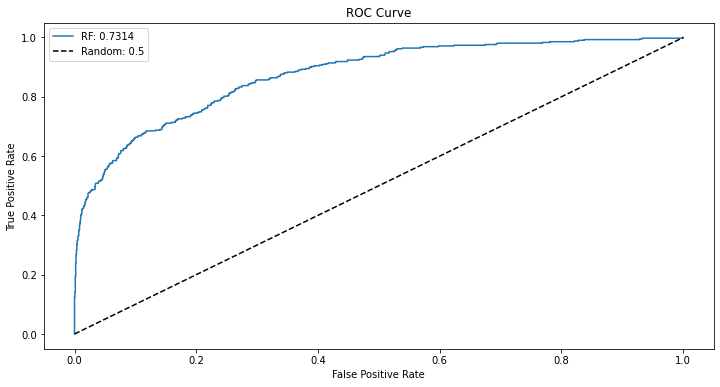

In [ ]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_rf_test, 
         true_rf_test, 
         label = 'RF: ' + str(round(roc_rf_test, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

# __9. Neural Network classifier (preparation)__


In [ ]:
# import necessary neural network libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# libraries for data processing and train-test data spliting

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# libraries for metrics

from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# setting up the features variable X and target variable y

X = data.drop(['Exited'], axis = 1)
y = data['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Here we turn the categorical variables __Geography__ and __ Gender__ into one-hot encoding vectors.

In [ ]:
# one-hot encoding of categorical variables

labelEncoder = LabelEncoder()

X['Geography'] = labelEncoder.fit_transform(X['Geography'])
X['Gender'] = labelEncoder.fit_transform(X['Gender'])

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
# train-test split of the data (80 % - 20 % split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

# scale the values of the data variables
# for easier computations

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('X train shape:\t', X_train.shape)
print('y train shape:\t', y_train.shape)
print('X test shape:\t', X_test.shape)
print('y test shape:\t', y_test.shape)

X train shape:	 (8000, 10)
y train shape:	 (8000,)
X test shape:	 (2000, 10)
y test shape:	 (2000,)


# __10. Neural Network classifier (1 Hidden layer - without Early Stopping)__

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 1
* __Number of neurons:__ 500
* __Hidden layer activation:__ ReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 500

In [ ]:
# setting up the neural network model

nn_model = Sequential()

nn_model.add(Dense(500, activation = 'relu', input_dim = X.shape[1]))
nn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# setting up the optimizer, loss, and metrics for the model

nn_model.compile(optimizer = 'adam', 
                 loss = 'binary_crossentropy', 
                 metrics=['accuracy'])

In [ ]:
# fitting the neural model to the training data 

history = nn_model.fit(X_train, y_train, validation_data = (X_test, y_test), 
                       epochs=100, verbose=1)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4285 - accuracy: 0.8214 - val_loss: 0.3892 - val_accuracy: 0.8345
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.8484 - val_loss: 0.3619 - val_accuracy: 0.8520
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8547 - val_loss: 0.3552 - val_accuracy: 0.8505
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.8569 - val_loss: 0.3515 - val_accuracy: 0.8505
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8589 - val_loss: 0.3589 - val_accuracy: 0.8460
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8574 - val_loss: 0.3560 - val_accuracy: 0.8510
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8587 - val_loss: 0.3493 - val_accuracy: 0.8515

In [ ]:
# evaluating the model's performance on the train data and test data

_, train_acc = nn_model.evaluate(X_train, y_train, verbose=1)
_, test_acc = nn_model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8410

Train accuracy: 89.662 %
Test accuracy:	84.100 %


In [ ]:
# predict the test values to get the confusion matrix 

y_pred = nn_model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))

[[1470  123]
 [ 195  212]]


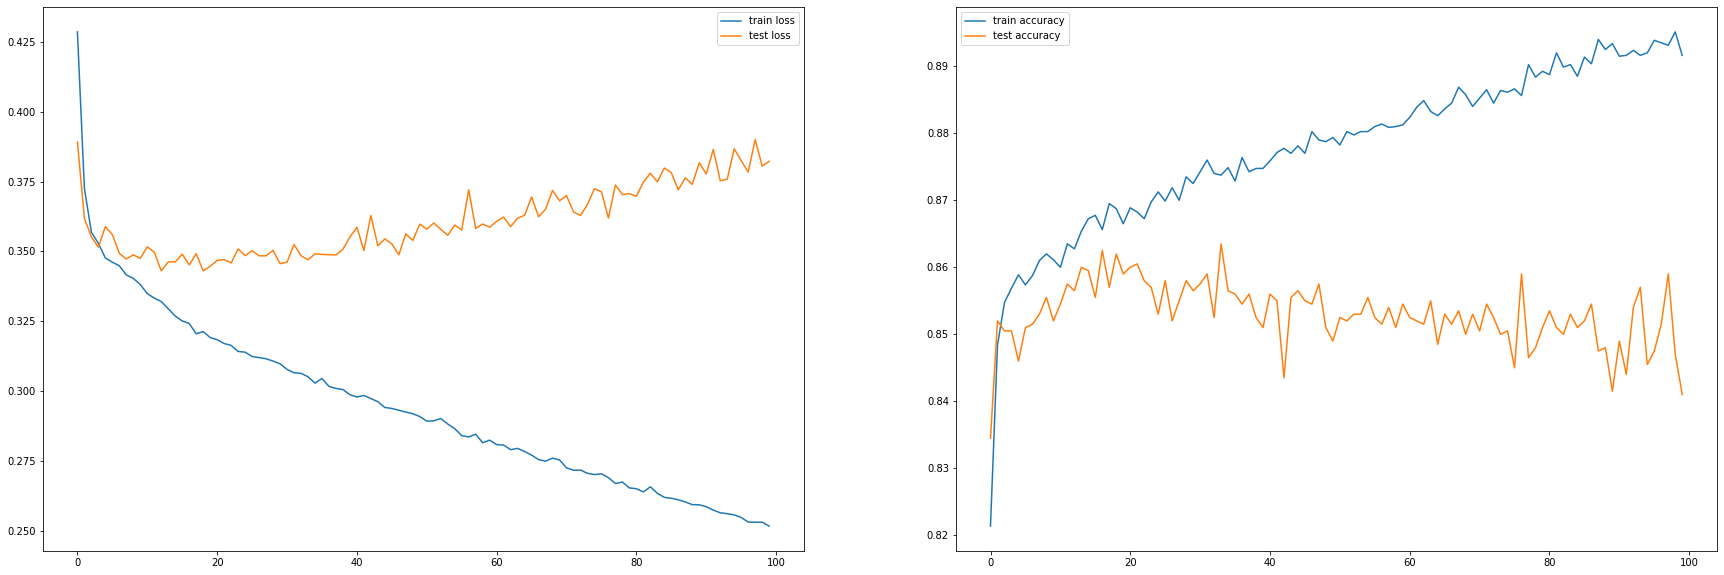

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

# __11. Neural Network classifier (1 Hidden layer - with Early Stopping)__

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 1
* __Number of neurons:__ 500
* __Hidden layer activation:__ ReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 500
* __Early stopping:__ On validation loss

In [ ]:
# setting up the neural network model

nn_model_es = Sequential()

nn_model_es.add(Dense(500, activation = 'relu', input_dim = X.shape[1]))
nn_model_es.add(Dense(1, activation='sigmoid'))

In [ ]:
# setting up the optimizer, loss, and metrics for the model

nn_model_es.compile(optimizer = 'adam', 
                    loss = 'binary_crossentropy', 
                    metrics=['accuracy'])

In [ ]:
# setting up the Early Stopping criterion on validation loss

earlyStopping = EarlyStopping(monitor='val_loss', 
                              mode='min',
                              verbose=1)

In [ ]:
# fitting the neural model to the training data 

history = nn_model_es.fit(X_train, y_train, validation_data = (X_test, y_test), 
                          epochs=500, verbose=1, callbacks=[earlyStopping])

Epoch 1/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.8146 - val_loss: 0.3901 - val_accuracy: 0.8330
Epoch 2/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8474 - val_loss: 0.3612 - val_accuracy: 0.8495
Epoch 3/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8579 - val_loss: 0.3545 - val_accuracy: 0.8520
Epoch 4/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8568 - val_loss: 0.3573 - val_accuracy: 0.8565
Epoch 00004: early stopping


In [ ]:
# evaluating the model's performance on the train data and test data

_, train_acc = nn_model.evaluate(X_train, y_train, verbose=1)
_, test_acc = nn_model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8565

Train accuracy: 85.975 %
Test accuracy:	85.650 %


In [ ]:
# predict the test values to get the confusion matrix 

y_pred = nn_model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))

[[1535   58]
 [ 229  178]]


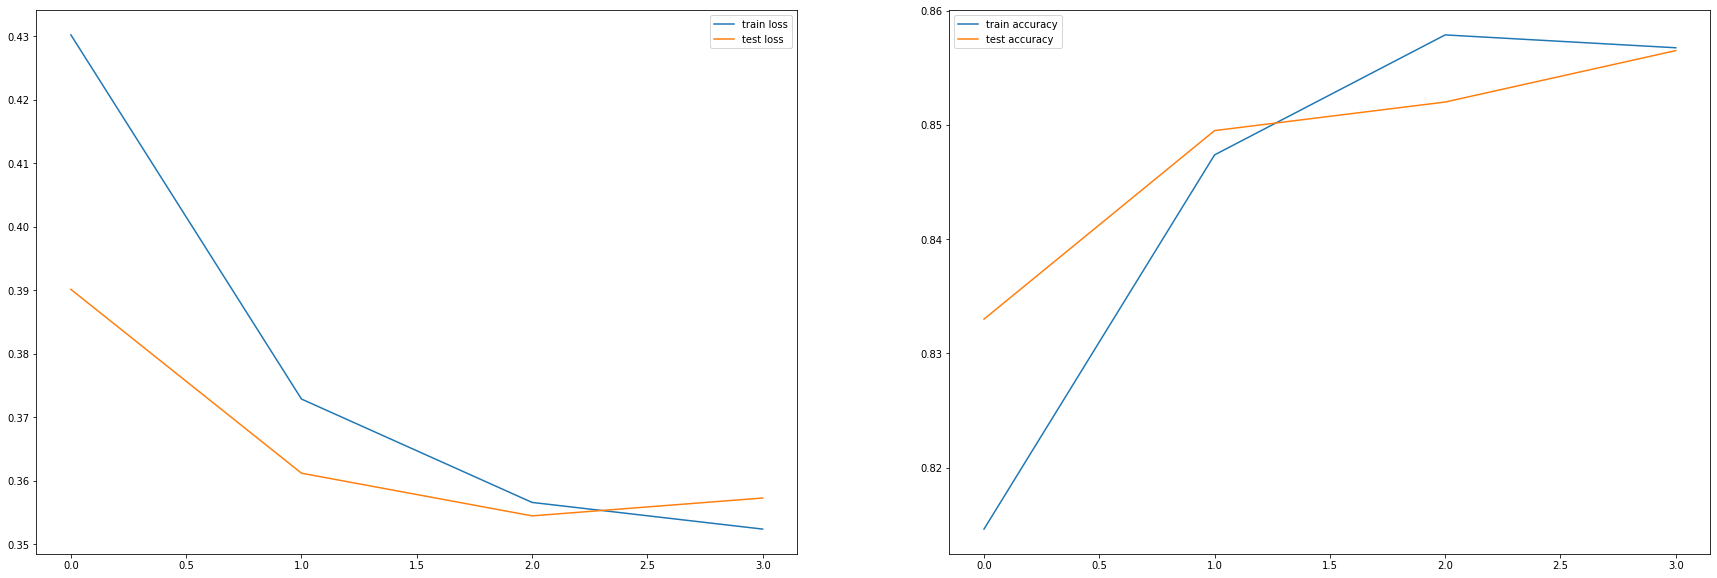

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

# __12. Neural Network classifier (5 Hidden layers - without Early Stopping)__

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 5
* __Hidden layer activation:__ LeakyReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 100

In [ ]:
X = data.iloc[:, 3:13].values
y = data['Exited'].values   

# removing unnecessary columns

dataset = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

x = dataset.apply(LabelEncoder().fit_transform)

# one-hot encoding

OneHotEncode = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(OneHotEncode.fit_transform(x[['Geography']]).toarray())

x = x.join(enc_df)
x = x.drop(['Geography', 'Exited'], axis=1)
x = x.rename(columns={0: 'France', 1:'Spain', 2:'Germany'})
z = x
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Spain,Germany
0,228,0,24,2,0,0,1,1,5068,1.0,0.0,0.0
1,217,0,23,1,743,0,0,1,5639,0.0,0.0,1.0
2,111,0,24,8,5793,2,1,0,5707,1.0,0.0,0.0
3,308,0,21,1,0,1,0,0,4704,1.0,0.0,0.0
4,459,0,25,2,3696,0,1,1,3925,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

# train-test data split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler

# scaling the data

X_train = StandardScaler().fit_transform(X_train)
X_test  = StandardScaler().fit_transform(X_test)

In [ ]:
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dropout, Dense, LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras import initializers
 
# define network as a method
def create_model():

    initializer = 'glorot_normal'

    # create model
    model = Sequential()
    model.add(Dense( input_dim = 12, units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))

    # Adding the 2nd layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))
    
    # Adding the 3rd layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))
    
    # Adding the fourth hidden layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    model.add(Dropout(rate = 0.2))
    
    # Adding the fifth hidden layer
    model.add(Dense( units = 21, kernel_initializer = initializer))
    model.add(LeakyReLU(alpha = 0.25))
    
    # Adding the output layer
    model.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform')) # uniform
    
    # Compile model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

# fitting the model

model = create_model()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), 
                       batch_size = 16, epochs=100, verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.4904 - accuracy: 0.7928 - val_loss: 0.4403 - val_accuracy: 0.8045
Epoch 2/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.4466 - accuracy: 0.8048 - val_loss: 0.4252 - val_accuracy: 0.8170
Epoch 3/100
8000/8000 [==============================] - 1s 105us/step - loss: 0.4389 - accuracy: 0.8095 - val_loss: 0.4162 - val_accuracy: 0.8230
Epoch 4/100
8000/8000 [==============================] - 1s 105us/step - loss: 0.4311 - accuracy: 0.8146 - val_loss: 0.4102 - val_accuracy: 0.8350
Epoch 5/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.4261 - accuracy: 0.8166 - val_loss: 0.4042 - val_accuracy: 0.8355
Epoch 6/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4204 - accuracy: 0.8231 - val_loss: 0.3968 - val_accuracy: 0.8390
Epoch 7/100
8000/8000 [==============================] - 1s 106us/step

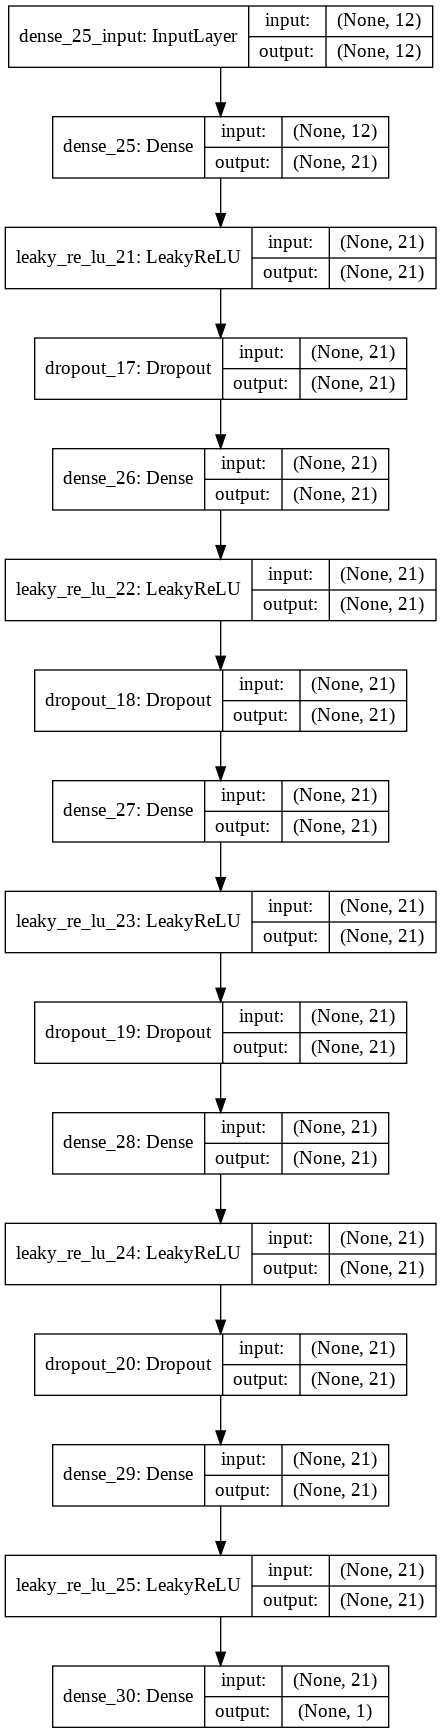

In [ ]:
# show network structure
keras.utils.plot_model(model, "network.png", show_shapes=True)

In [ ]:
# evaluating the model's performance on the train data and test data

_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

2000/2000 [==============================] - 0s 23us/step

Train accuracy: 86.750 %
Test accuracy:	86.550 %


In [ ]:
# predict the test values to get the confusion matrix 

y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))

[[1542   53]
 [ 216  189]]


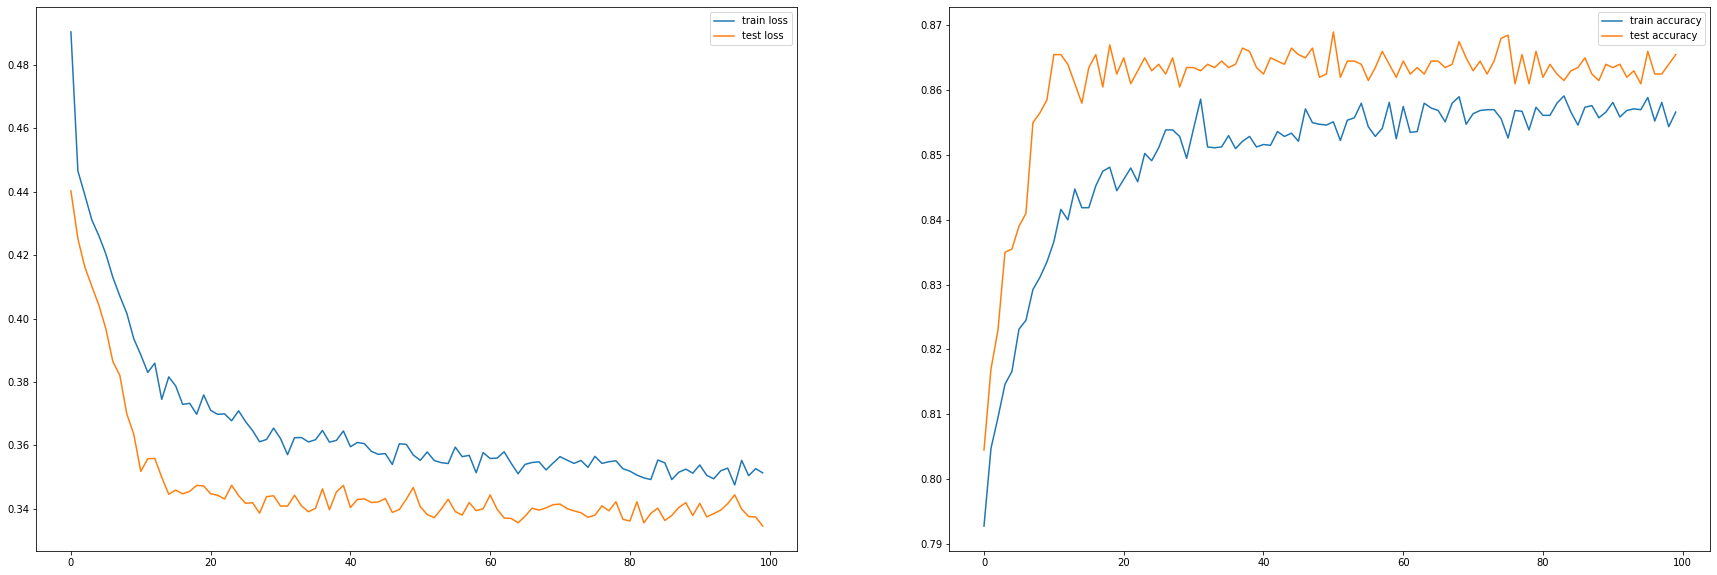

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

# __13. Neural Network classifier (5 Hidden layers - with Early Stopping)__

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 5
* __Hidden layer activation:__ LeakyReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 100

In [ ]:
# setting up the Early Stopping criterion on validation loss

earlyStopping = EarlyStopping(monitor='val_loss', 
                              mode='min',
                              verbose=1)

In [ ]:
# fitting the model

model = create_model()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), 
                    batch_size = 16, epochs=100, verbose=1, 
                    callbacks=[earlyStopping])

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.4857 - accuracy: 0.7951 - val_loss: 0.4317 - val_accuracy: 0.8015
Epoch 2/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4444 - accuracy: 0.8039 - val_loss: 0.4179 - val_accuracy: 0.8240
Epoch 3/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.4290 - accuracy: 0.8129 - val_loss: 0.3994 - val_accuracy: 0.8365
Epoch 4/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4151 - accuracy: 0.8220 - val_loss: 0.3808 - val_accuracy: 0.8480
Epoch 5/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4061 - accuracy: 0.8271 - val_loss: 0.3714 - val_accuracy: 0.8560
Epoch 6/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.3940 - accuracy: 0.8366 - val_loss: 0.3626 - val_accuracy: 0.8645
Epoch 7/100
8000/8000 [==============================] - 1s 107us/step

In [ ]:
# evaluating the model's performance on the train data and test data

_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)

print()

# print the train accuracy and test accuracy

print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

2000/2000 [==============================] - 0s 22us/step

Train accuracy: 85.350 %
Test accuracy:	86.650 %


In [ ]:
# predict the test values to get the confusion matrix 

y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))

[[1581   14]
 [ 263  142]]


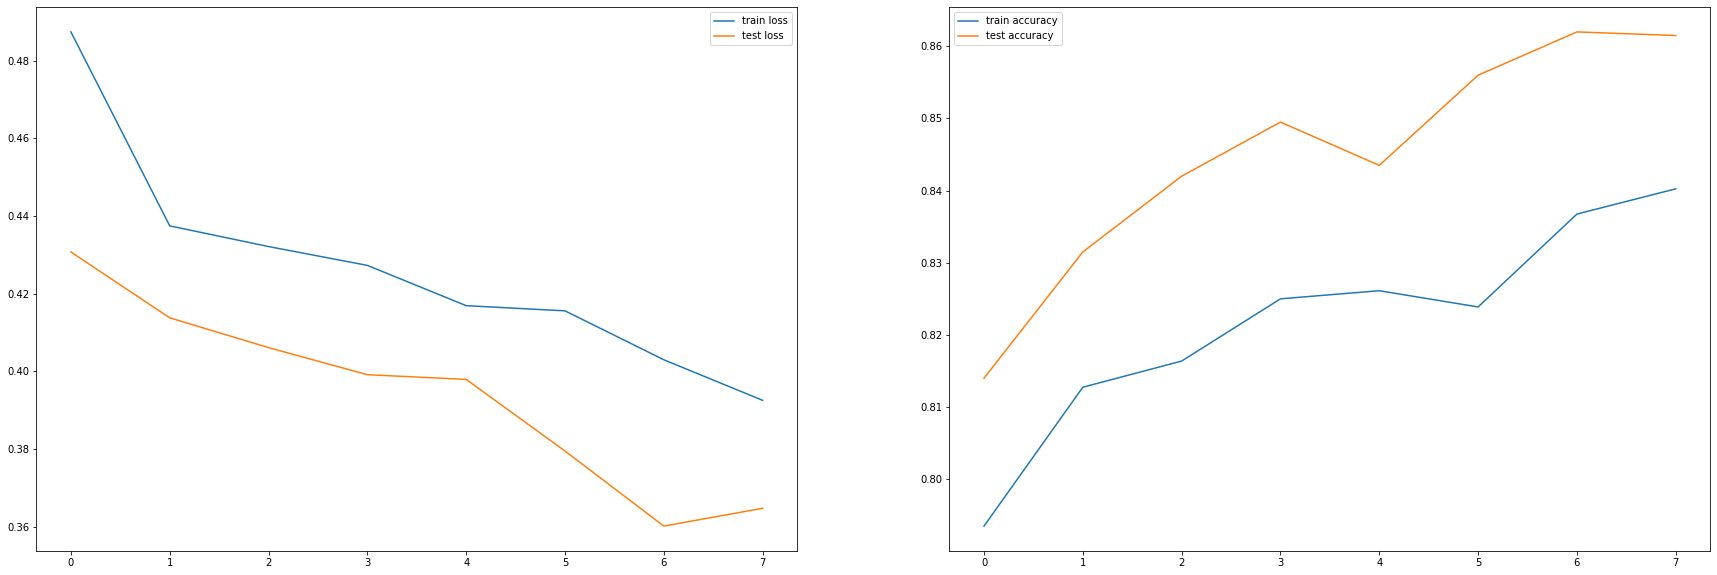

In [ ]:
# plot the accuracy and loss graphs for train and test data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

Here, we have trained four neural network models; two without early stopping and the other two with a simple early stopping criterion. The summary of the training and testing accuracy scores are given in the table below:


|Model|# Hidden layers|Early Stopping|Epochs|Train Acc. %|Test Acc. %|
|----|----|----|----|----|----|
|1|1|No|50|__89.662__|84.100|
|2|1|Yes|5|85.975|85.650|
|3|5|No|100|86.750|86.550|
|4|5|Yes|10|85.350|__86.650__|

### __Neural Model 1: 1 hidden layer (without Early Stopping)__

What we see here is that the first model gives a higher training accuracy of __89.662 %__ most likely because this models overfits to the training data. It also gives a lower test accuracy due to this reason.

### __Neural Model 2: 1 hidden layer (with Early Stopping)__

The second model is the exact same neural network again but this time with an early stopping criterion. We see that the model now stops at epoch number 5. Here we see that the training accuracy is much lower at 85.975 % because it could not overfit to the data. However, we get a better test accuracy of __85.650 %__ in this case.

### __Neural Model 3: 5 hidden layers (without Early Stopping)__

Then we try to use multiple (5) fully-connected hidden layers with the __LeakyReLU__ activation function. The third model uses these settings to train for 100 epochs without any early stopping criterion. We see that we get a slightly higher test accuracy __(86.55 %)__. This is probably because there are more hidden layers with better activation functions involved.

### __Neural Model 4: 5 hidden layers (with Early Stopping)__

In this last neural model, we use the same settings as the third model, but with a simple early stopping criterion. Luckily, we see that the model stops after 10 epochs only, but again gives a slightly better test accuracy __(86.65 %)__ than before. As seen before, we again see that the training accuracy is much higher for models without early stopping, which is most likely caused by overfitting.


# __14. Federated Learning__

Assuming the bank has 3 branches in 3 different countries (namely clients) and a central server, we have implemented federated SGD algorithm. The Server runs a couple of forward and backward operations on each client and then collects the data from each of them. It then updates the weights in the clients after calculating the new weights.

In [ ]:
# Federated Learning

from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

np.random.seed(8)

# one-hot encoding

X = data.apply(LabelEncoder().fit_transform)
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(oneHotEncoder.fit_transform(X[['Geography']]).toarray())

# removing unnecessary columns form from main data

X = X.join(enc_df)
X = X.drop(['Geography', 'Exited', 'CreditScore'], axis=1)#, 'CreditScore'
X = X.rename(columns={0: 'France', 1:'Spain', 2:'Germany'})

# train-test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test = y_test.reshape((1, y_test.shape[0]))[0]

# removing unnecessary columns from test data

X_test = X_test.drop(['France', 'Spain', 'Germany'], axis = 1)

# scaling the test data

X_test  = StandardScaler().fit_transform(X_test).T

# Federated Data

France_GT = y_train[X_train['France']==1]
France_GT = France_GT.reshape(1, France_GT.shape[0])#, 1)
France_data = X_train[X_train['France']==1.].drop(['France','Spain','Germany'], axis = 1)

Germany_GT = y_train[X_train['Germany']==1]
Germany_GT = Germany_GT.reshape(1, Germany_GT.shape[0])#, 1)
Germany_data = X_train[X_train['Germany']==1.].drop(['France','Spain','Germany'], axis = 1)

Spain_GT = y_train[X_train['Spain']==1]
Spain_GT = Spain_GT.reshape(1, Spain_GT.shape[0])#, 1)
Spain_data = X_train[X_train['Spain']==1.].drop(['France','Spain','Germany'], axis = 1)

# Normalize Data

France_data = (StandardScaler().fit_transform(France_data)).T
Germany_data = (StandardScaler().fit_transform(Germany_data)).T
Spain_data = (StandardScaler().fit_transform(Spain_data)).T


def d_ReLu(input, alpha = .25): # calculates the derivative d(leakyReLu)/d(input)
  return np.where(input>0, 1., alpha)

def leakyReLu(input, alpha = .25):
  return np.where(input > 0, input, input * alpha)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#===============================================================================
#===== CLIENT CLASS ============================================================

# The clients are assumed to be branches located in 3 different countries. Each 
# of the clients is a 2 layered NN with weights w1,b1 for layer1, and 
# w2, b2 for output layer, and for the partial derivatives we have the following 
# simplification in the namings:
# dw1 = dL/dw1, db1 = dL/db1, dw2 = dL/dw2 and ...

class client():

  def __init__(self, input, unit1, GT):
    print("Client constructor, input shape is: ", input.shape)
    self.w1 = np.random.randn(unit1, input.shape[0]) * .01
    self.b1 = np.zeros((unit1, 1))
    self.z1 = np.zeros((unit1, input.shape[1])) # z1 = w1.X + b1
    self.a1 = np.zeros((unit1, input.shape[1])) # a1 = leakyReLu(z1)

    self.da1 = np.zeros((unit1, input.shape[1])) # dL/da1
    self.dz1 = np.zeros((unit1, input.shape[1])) # dL/dz1
    self.db1 = np.zeros((unit1, 1))              # dL/db1
    self.dw1 = np.zeros(self.w1.shape)           # dL/dw1

    self.w2 = np.random.randn(1, unit1) * .01
    self.b2 = np.zeros((1, 1))
    self.z2 = np.zeros((1, input.shape[1]))      # z2 = w2.a1 + b2
    self.a2 = np.zeros((1, input.shape[1]))      # a2 = sigmoid(z2)

    self.dz2 = np.zeros(self.a2.shape)            # dL/dz2
    self.db2 = np.zeros((1,1))                    # dL/db2
    self.dw2 = np.zeros((1,unit1))                # dL/dw2

    self.pred = np.zeros(GT.shape)
    self.unit1 = unit1
    self.input = input
    self.GT = GT

  def forward(self, input = None):
    test = False if input is None else True            # wether we are in test phase or not
    input = input if input is not None else self.input # either test or train data is input
    # first layer
    self.z1 = np.matmul(self.w1, input) + self.b1
    self.a1 = leakyReLu(input=self.z1)

    # second layer
    self.z2 = np.matmul(self.w2, self.a1) + self.b2
    self.a2 = sigmoid(self.z2)
    
    self.pred = (self.a2 > 0.5)

    if test:
      print()
    else:
      print("forward() ======> loss: ", self.loss() / self.input.shape[1])
    return self.a2

  def backward(self):
    m = self.input.shape[1]
    self.dz2 = self.a2 - self.GT                                        # dL/dz2 = a2 - Y
    self.dw2 = (1 / m) * (np.matmul(self.dz2,(self.a1).T))              # dL/dw2 = 1/m((dL/dz2).(a1.T))
    self.db2 = (1 / m)*(np.sum(self.dz2, axis=1, keepdims = True))      # dL/db2 = 1/m(sigma(dL/dz2i))
    self.dz1 = np.matmul((self.w2).T,self.dz2) * d_ReLu(self.z1)        # dL/dz1 = (w2.T).(dL/dz2) * (d_Relu/dz1)
    self.dw1 = (1 / m) * np.matmul(self.dz1, (self.input).T)            # dL/dw1 = 1/m((dL/dz1).(X.T))
    self.db1 = (1 / m) * np.sum(self.dz1, axis = 1, keepdims=True)      # dL/db1 = 1/m(sigma(dL/dz1i))
    grads = {"dw1": self.dw1,
             "db1": self.db1,
             "dw2": self.dw2,
             "db2": self.db2,
             "m"  : m}
    return grads

  def loss(self):
    return log_loss(self.GT, self.pred)

  def update_weights(self, w1, b1, w2, b2):
    self.w1 = w1
    self.b1 = b1
    self.w2 = w2
    self.b2 = b2

  def predict(self, x_test):
    a = self.forward(input = x_test);
    return ((a>0.5)[0]).reshape(1, ((a > 0.5)[0]).shape[0])

#===============================================================================
# SERVER CLASS =================================================================

#The server class is assumed to be the "bank head office" that manages its branches
# in different countries. It administrates the model updates and directs the branches.
# Clients communication only through the server (e.g. the information about local
# data (gradients) that passes to the clients via updated weights in server).

class server():

  def __init__(self, unit1, features ):

    # initialize the weights
    self.w1 = np.random.randn(unit1, features) * .01  # initialize w1 to a small random value to avoid symmetry problem
    self.b1 = np.zeros((unit1, 1))
    self.w2 = np.random.randn(1, unit1) * .01         # initialize w2 to a small random value to avoid symmetry problem
    self.b2 = np.zeros((1, 1))

    self.m_fr , self.m_gr, self.m_sp = France_data.shape[1], Germany_data.shape[1], Spain_data.shape[1]
    self.m_total = self.m_fr + self.m_gr + self.m_sp

    # instantiate French client    
    self.France_branch = client(France_data, unit1, France_GT)
    self.France_branch.update_weights(self.w1, self.b1, self.w2, self.b2) 

    # instantiate German client
    self.Germany_branch = client(Germany_data, unit1, Germany_GT)
    self.Germany_branch.update_weights(self.w1, self.b1, self.w2, self.b2)

    # instantiate Spanish client
    self.Spain_branch = client(Spain_data, unit1, Spain_GT)
    self.Spain_branch.update_weights(self.w1, self.b1, self.w2, self.b2)

  def step(self, lr):

    # forward and backward in French branch
    print("\nFrance: ")
    self.France_branch.forward()
    grads1 = self.France_branch.backward()

    # forward and backward in German branch
    print("\nGermany: ")
    self.Germany_branch.forward()
    grads2 = self.Germany_branch.backward()

    # forward and backward in Spanish branch
    print("\nSpain: ")
    self.Spain_branch.forward()
    grads3 = self.Spain_branch.backward()

    grads = grads1
    
    # in case local data sizes have changed update them
    self.m_total = grads1['m'] + grads2['m'] + grads3['m']
    self.m_fr, self.m_gr, self.m_sp = grads1['m'], grads2['m'], grads3['m']

    for key in grads:
      if key != 'm':
        grads[key] = (self.m_fr / self.m_total) * grads1[key] + \
        (self.m_gr / self.m_total) * grads2[key] + (self.m_sp / self.m_total) * grads3[key]

    # update weights
    self.w1 = self.w1 - lr * grads['dw1']
    self.b1 = self.b1 - lr * grads['db1']
    self.w2 = self.w2 - lr * grads['dw2']
    self.b2 = self.b2 - lr * grads['db2']

    # broadcast updated weights
    self.France_branch.update_weights(self.w1, self.b1, self.w2, self.b2)
    self.Germany_branch.update_weights(self.w1, self.b1, self.w2, self.b2)
    self.Spain_branch.update_weights(self.w1, self.b1, self.w2, self.b2)

  def predict(self, x_train):
    # test has to be done in one of the clients, all of them have the same model weights and the results would be the same
    return self.France_branch.predict(x_train)[0]  


units = 21
iterations = 600

srv = server(units, France_data.shape[0])

for i in range(iterations):
  srv.step(lr = 1.9)

print("-------------")
print("Accuracy is: %.3f %%" % (accuracy_score(srv.predict(X_test), y_test) * 100))

Streaming output truncated to the last 5000 lines.
forward() ======> loss:  11.542635221620811

France: 
forward() ======> loss:  5.3169049329692335

Germany: 
forward() ======> loss:  5.918834643773768

Spain: 
forward() ======> loss:  11.465488692826764

France: 
forward() ======> loss:  5.307353761097045

Germany: 
forward() ======> loss:  5.860675495489013

Spain: 
forward() ======> loss:  11.353969267471424

France: 
forward() ======> loss:  5.285823790991004

Germany: 
forward() ======> loss:  5.8295002669559715

Spain: 
forward() ======> loss:  11.287066864165409

France: 
forward() ======> loss:  5.25022960903933

Germany: 
forward() ======> loss:  5.833118099310631

Spain: 
forward() ======> loss:  11.174206357465485

France: 
forward() ======> loss:  5.217220134742745

Germany: 
forward() ======> loss:  5.819227072276922

Spain: 
forward() ======> loss:  11.101884096354967

France: 
forward() ======> loss:  5.2101280180436715

Germany: 
forward() ======> loss:  5.820972309800